In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df_cols = ['start', 'duration', 'usage']
df = pd.read_csv('data/all.csv', names = df_cols)
df.tail(24)

,start,duration,usage
18142,1594771200,3600,175
18143,1594774800,3600,220
18144,1594778400,3600,195
18145,1594782000,3600,150
18146,1594785600,3600,195
18147,1594789200,3600,220
18148,1594792800,3600,250
18149,1594796400,3600,185
18150,1594800000,3600,295
18151,1594803600,3600,315


In [3]:
df['local_time'] = df['start'].apply(dt.datetime.utcfromtimestamp)
df['date'] = df['local_time'].apply(lambda dt: dt.date())
df['weekday'] = df['date'].apply(lambda dt: dt.weekday())
df['time'] = df['local_time'].apply(lambda dt: dt.time())
df.tail(30)

,start,duration,usage,local_time,date,weekday,time
18136,1594749600,3600,280,2020-07-14 18:00:00,2020-07-14,1,18:00:00
18137,1594753200,3600,330,2020-07-14 19:00:00,2020-07-14,1,19:00:00
18138,1594756800,3600,245,2020-07-14 20:00:00,2020-07-14,1,20:00:00
18139,1594760400,3600,215,2020-07-14 21:00:00,2020-07-14,1,21:00:00
18140,1594764000,3600,195,2020-07-14 22:00:00,2020-07-14,1,22:00:00
18141,1594767600,3600,230,2020-07-14 23:00:00,2020-07-14,1,23:00:00
18142,1594771200,3600,175,2020-07-15 00:00:00,2020-07-15,2,00:00:00
18143,1594774800,3600,220,2020-07-15 01:00:00,2020-07-15,2,01:00:00
18144,1594778400,3600,195,2020-07-15 02:00:00,2020-07-15,2,02:00:00
18145,1594782000,3600,150,2020-07-15 03:00:00,2020-07-15,2,03:00:00


In [4]:

bydate = pd.DataFrame(df[['date', 'duration', 'usage']].groupby(by='date').agg({'duration': np.sum, 'usage': [np.min, np.sum, np.max, np.mean]}))
bydate.tail(40)
                     

duration usage                         
                sum  amin    sum  amax        mean
date                                              
2020-06-06    86400   190  10435   690  434.791667
2020-06-07    86400   155   7885   500  328.541667
2020-06-08    86400   160  13410  1990  558.750000
2020-06-09    86400   195   8295   490  345.625000
2020-06-10    86400   190   9670  1655  402.916667
2020-06-11    86400   195   8275   940  344.791667
2020-06-12    86400   200   8580   755  357.500000
2020-06-13    86400   210   8005   570  333.541667
2020-06-14    86400   210  11920  1855  496.666667
2020-06-15    86400   200   9495   830  395.625000
2020-06-16    86400   180   9920  1985  413.333333
2020-06-17    86400   180   8365  1010  348.541667
2020-06-18    86400   175   7400   625  308.333333
2020-06-19    86400   165  11455  1150  477.291667
2020-06-20    86400   280  10880  1105  453.333333
2020-06-21    86400   170   7440   770  310.000000
2020-06-22    86400   180  10740  1075  447.500000
2020-06-23    86400   180   9255  1350  385.625000
2020-06-24    86400   170   9805  1190  408.541667
2020-06-25    86400   200  10700  1990  445.833333
2020-06-26    86400   210   9480   840  395.000000
2020-06-27    86400   355  11015   950  458.958333
2020-06-28    86400   165   9435   775  393.125000
2020-06-29    86400   205   8015   495  333.958333
2020-06-30    86400   185   7980   835  332.500000
2020-07-01    86400   130  10150  1760  422.916667
2020-07-02    86400   140   4400   435  183.333333
2020-07-03    86400   135   3950   255  164.583333
2020-07-04    86400   145   3960   225  165.000000
2020-07-05    86400   140   5200   595  216.666667
2020-07-06    86400   165   6440   550  268.333333
2020-07-07    86400   185   7330   550  305.416667
2020-07-08    86400   200   8915   855  371.458333
2020-07-09    86400   170   9465   860  394.375000
2020-07-10    86400   195   8850   640  368.750000
2020-07-11    86400   195  11580  2005  482.500000
2020-07-12    86400   190   8335   870  347.291667
2020-07-13    86400   205   7245   470  301.875000
2020-07-14    86400   180   5680   330  236.666667
2020-07-15    86400   110   6440   735  268.333333

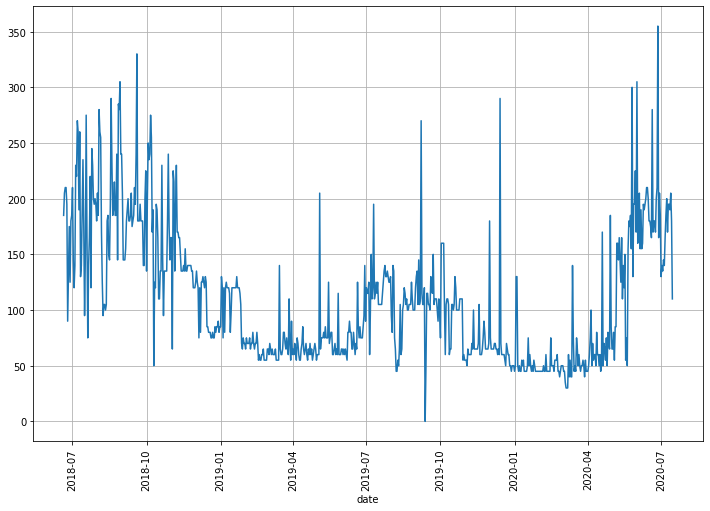

In [5]:
dailymin = bydate['usage']['amin']
dailymin.plot.line(grid=True, rot=90, figsize=(12,8))


In [6]:
# what is the dip to 0?
dailymin[dailymin==0].index[0]


datetime.date(2019, 9, 12)

In [7]:
df[df['date']==dailymin[dailymin==0].index[0]] # there was a power outage this morning

,start,duration,usage,local_time,date,weekday,time
10775,1568246400,3600,235,2019-09-12 00:00:00,2019-09-12,3,00:00:00
10776,1568250000,3600,80,2019-09-12 01:00:00,2019-09-12,3,01:00:00
10777,1568253600,3600,95,2019-09-12 02:00:00,2019-09-12,3,02:00:00
10778,1568257200,3600,75,2019-09-12 03:00:00,2019-09-12,3,03:00:00
10779,1568260800,3600,0,2019-09-12 04:00:00,2019-09-12,3,04:00:00
10780,1568264400,3600,0,2019-09-12 05:00:00,2019-09-12,3,05:00:00
10781,1568268000,3600,0,2019-09-12 06:00:00,2019-09-12,3,06:00:00
10782,1568271600,3600,0,2019-09-12 07:00:00,2019-09-12,3,07:00:00
10783,1568275200,3600,0,2019-09-12 08:00:00,2019-09-12,3,08:00:00
10784,1568278800,3600,0,2019-09-12 09:00:00,2019-09-12,3,09:00:00


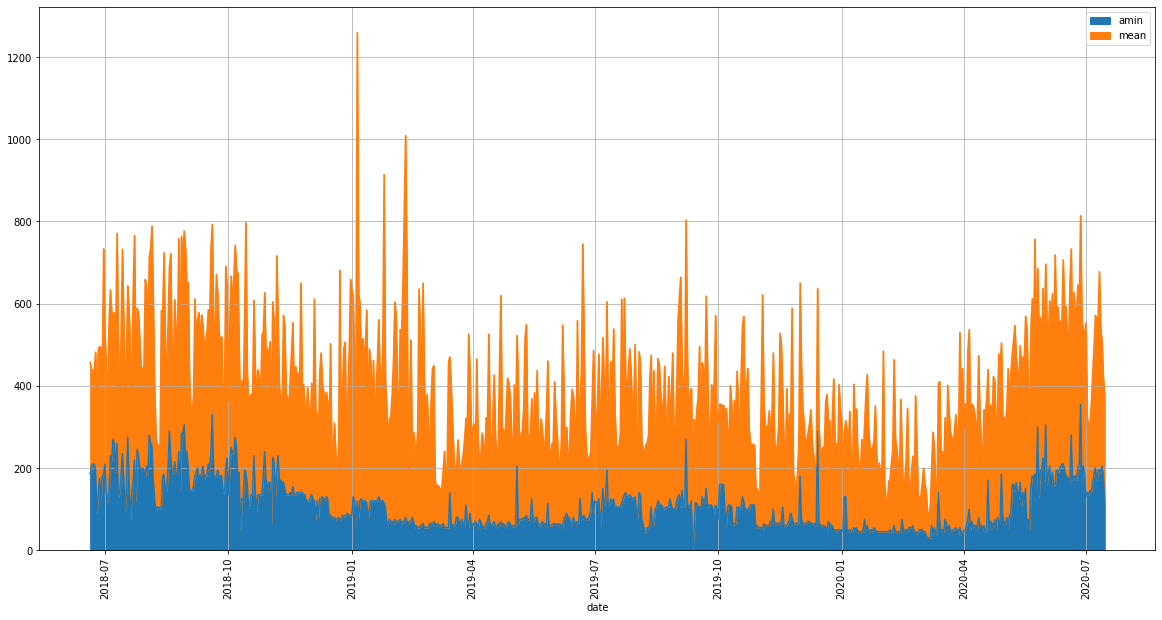

In [8]:
bydate['usage'][['amin', 'mean']].plot.area(grid=True, rot=90, figsize=(20,10))


In [9]:
# What's the highest usage?
daily_mean = bydate['usage']['mean']
daily_mean.max()
daily_mean[daily_mean==daily_mean.max()]


date
2019-01-05    1140.0
Name: mean, dtype: float64

In [10]:
high_date = daily_mean[daily_mean==daily_mean.max()].index[0]
df[df['date']==high_date] # there was a power outage this morning

,start,duration,usage,local_time,date,weekday,time
4776,1546646400,3600,1410,2019-01-05 00:00:00,2019-01-05,5,00:00:00
4777,1546650000,3600,1390,2019-01-05 01:00:00,2019-01-05,5,01:00:00
4778,1546653600,3600,1445,2019-01-05 02:00:00,2019-01-05,5,02:00:00
4779,1546657200,3600,790,2019-01-05 03:00:00,2019-01-05,5,03:00:00
4780,1546660800,3600,130,2019-01-05 04:00:00,2019-01-05,5,04:00:00
4781,1546664400,3600,120,2019-01-05 05:00:00,2019-01-05,5,05:00:00
4782,1546668000,3600,215,2019-01-05 06:00:00,2019-01-05,5,06:00:00
4783,1546671600,3600,120,2019-01-05 07:00:00,2019-01-05,5,07:00:00
4784,1546675200,3600,130,2019-01-05 08:00:00,2019-01-05,5,08:00:00
4785,1546678800,3600,265,2019-01-05 09:00:00,2019-01-05,5,09:00:00


In [11]:
bytime1 = pd.DataFrame(df[df['date']>dt.date(2020,6,1)][['time', 'duration', 'usage']].groupby(by=['time']).sum())
bytime1['usage_per_hour'] = bytime1.apply(lambda row: 3600*row['usage']/row['duration'], axis=1)
bytime1

,duration,usage,usage_per_hour
time,,,
00:00:00,158400,16600,377.272727
01:00:00,158400,14705,334.204545
02:00:00,158400,13450,305.681818
03:00:00,158400,12235,278.068182
04:00:00,158400,10730,243.863636
05:00:00,158400,9500,215.909091
06:00:00,158400,9650,219.318182
07:00:00,158400,9440,214.545455
08:00:00,158400,10230,232.500000


In [12]:
bytime2 = pd.DataFrame(df[(df['date']<dt.date(2020,5,1)) & (df['date']>dt.date(2020,3,8))][['time', 'duration', 'usage']].groupby(by=['time']).sum())
bytime2['usage_per_hour'] = bytime2.apply(lambda row: 3600*row['usage']/row['duration'], axis=1)
bytime2

,duration,usage,usage_per_hour
time,,,
00:00:00,190800,17025,321.226415
01:00:00,190800,14040,264.905660
02:00:00,190800,10230,193.018868
03:00:00,190800,8440,159.245283
04:00:00,190800,7325,138.207547
05:00:00,190800,6150,116.037736
06:00:00,190800,6010,113.396226
07:00:00,190800,6375,120.283019
08:00:00,190800,7175,135.377358


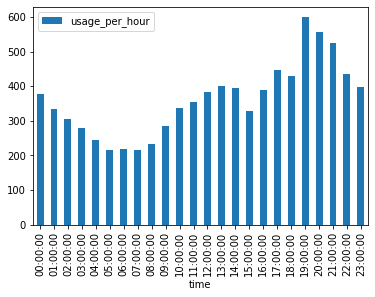

In [13]:
bytime1.plot.bar(y='usage_per_hour')

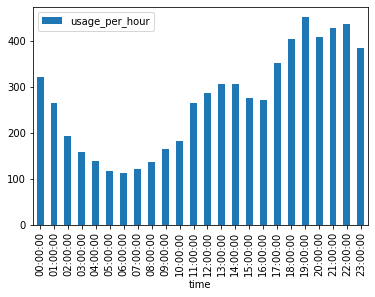

In [14]:
bytime2.plot.bar(y='usage_per_hour')

In [15]:
df['hour']=df['time'].apply(lambda tm: tm.hour)
df.head()

,start,duration,usage,local_time,date,weekday,time,hour
0,1529452800,3600,745,2018-06-20 00:00:00,2018-06-20,2,00:00:00,0
1,1529456400,3600,220,2018-06-20 01:00:00,2018-06-20,2,01:00:00,1
2,1529460000,3600,185,2018-06-20 02:00:00,2018-06-20,2,02:00:00,2
3,1529463600,3600,295,2018-06-20 03:00:00,2018-06-20,2,03:00:00,3
4,1529467200,3600,370,2018-06-20 04:00:00,2018-06-20,2,04:00:00,4


In [16]:
hourly_2020 = df[df['date']>=dt.date(2020, 1, 1)].set_index(['date', 'hour'])['usage']
hourly_2020_2d = hourly_2020.unstack(level=-1)

In [1]:
fig, ax = plt.subplots(figsize=(8, 24))
ax.imshow(hourly_2020_2d, aspect='auto', interpolation='nearest', cmap='hot')
ax.set_xticks(hourly_2020_2d.index)

NameError: name 'plt' is not defined

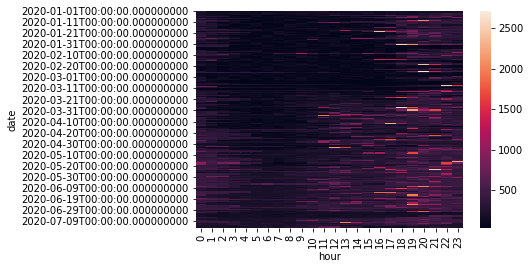

In [18]:
ax = sns.heatmap(hourly_2020_2d)
plt.show()

In [19]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
